In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.cleanning_fooddf
import src.cleanning_pollutiondf
import src.analysis
import src.scrapping
from bs4 import BeautifulSoup
import requests

In [2]:
def GetFile(path):
    df = pd.read_csv(path)
    return df

In [3]:
dffood=GetFile("./input/FAO.csv")

In [4]:
def CleaningFoodDf(df):
    df=src.cleanning_fooddf.DropColumns(df)
    df=src.cleanning_fooddf.CleanColNames(df)
    df=src.cleanning_fooddf.CountryNames(df)
    df=src.cleanning_fooddf.FilterUeCountries(df)
    df=src.cleanning_fooddf.GroupSumCountries(df)
    df=src.cleanning_fooddf.RenameColArea(df)
    df=src.cleanning_fooddf.RecolocateDf(df)
    
    return df

#falta exportar el csv limpio en el return? (r'./output/food-production.csv')

In [5]:
dffood=CleaningFoodDf(dffood)

/home/eduardo/Documentos/proyectos/pipelines-project-foodproduction/src/cleanning_fooddf.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Area'][41]='Republic of Cyprus'
/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/eduardo/Documentos/proyectos/pipelines-project-foodproduction/src/cleanning_fooddf.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Area'][4

In [6]:
dffood.head()

Country  Year  Austria  Belgium  Bulgaria  Croatia  Czech Republic  Denmark  \
0        1990  24721.0      0.0   26073.0      0.0             0.0  23218.0   
1        1991  24461.0      0.0   27231.0      0.0             0.0  23248.0   
2        1992  24427.0      0.0   21809.0   9525.0             0.0  23610.0   
3        1993  24317.0      0.0   19150.0   9972.0             0.0  23199.0   
4        1994  24389.0      0.0   19537.0  10754.0             0.0  23628.0   

Country  Estonia  Finland    France  ...  Netherlands    Poland  Portugal  \
0            0.0  14901.0  171107.0  ...      70331.0  149870.0   28181.0   
1            0.0  13797.0  176966.0  ...      62610.0  141291.0   27411.0   
2         4771.0  13703.0  170332.0  ...      66338.0  123873.0   26344.0   
3         4294.0  13207.0  176487.0  ...      58813.0  140162.0   27717.0   
4         3646.0  13711.0  173802.0  ...      63656.0  124010.0   28202.0   

Country  Republic of Cyprus  Romania  Slovakia  Slovenia     Spain   Sweden  \
0                      13.0  62989.0       0.0       0.0  120074.0  24271.0   
1                       9.0  60804.0       0.0       0.0  120149.0  23511.0   
2                       8.0  61463.0       0.0    4087.0  117991.0  23707.0   
3                      13.0  59847.0   13515.0    4454.0  117297.0  24404.0   
4                       9.0  62280.0   13147.0    4760.0  116546.0  24661.0   

Country  United Kingdom  
0              133515.0  
1              129751.0  
2              132955.0  
3              131707.0  
4              133588.0  

[5 rows x 29 columns]

In [7]:
def Scrapping(url):
    step1=src.scrapping.GetSoup(url)
    values=src.scrapping.InsertCols(step1)
    df=src.scrapping.CreateDf(values,step1)
    return df
    

In [8]:
prueba=Scrapping('https://stats.oecd.org/Index.aspx?DataSetCode=AIR_GHG')

In [9]:
def CleaningPollDf(df):
    df=src.cleanning_pollutiondf.SelectCols(df)
    df=src.cleanning_pollutiondf.CorrectNameCols(df)
    df=src.cleanning_pollutiondf.SelectCols(df)
    df=src.cleanning_pollutiondf.ReplaceUnknownVal(df)
    df=src.cleanning_pollutiondf.ChangeColType(df)
    df=src.cleanning_pollutiondf.TransformDf(df)
    return src.cleanning_pollutiondf.ExportCleanDfEmissions(df)


In [10]:
dfpoll=CleaningPollDf(prueba)

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
def Analysis(dffood,country):
    
    df_poll=src.analysis.OpenData(r'./output/Pollution-emissions.csv')
    maximos=src.analysis.Maximum(dffood,country)
    print(maximos)
    grafica_1, grafica_2 = src.analysis.CompareEvolutionGraffics(dffood,df_poll,country)
    src.analysis.SaveGraffics(grafica_1, grafica_2)
    

('The year with more production was:', 2002)


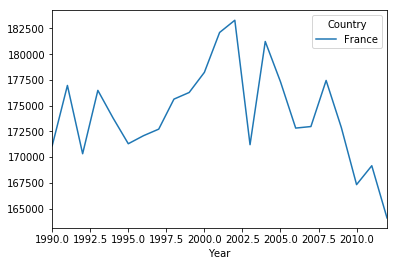

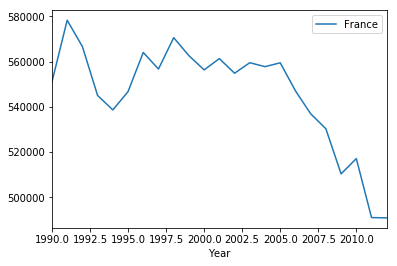

In [12]:
Analysis(dffood,'France')